In [3]:
import matplotlib
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import svm


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_iris, make_moons, make_circles
from sklearn.datasets._samples_generator import make_blobs
from sklearn.linear_model import LinearRegression, RANSACRegressor, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
#import statsmodels.api as sm
#import statsmodels.formula.api as smf

from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.base import clone
from sklearn.svm import SVR, SVC
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.decomposition import PCA, KernelPCA

#import graphviz
from sklearn import preprocessing
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import  iris_data
from mlxtend.plotting import plot_decision_regions
import itertools
from scipy.cluster.hierarchy import ward, dendrogram, linkage, fcluster




In [4]:
## ------------------------------------------ NOTAS ----------------------------------------
# Aprendizaje no supervisado: Clustering
# Es la misión de agrupar un conjunto de objetos de tal manera que los objetos del mismo grupo llamado cluster sean más similares
# el uno al otro que aquellos de otros grupos o clusters
#Ejemplos:
#Proceso de lenguaje natural (NLP)
#Vision computacional
#Stock markets
#Cliente / Segmentación de Mercado

#Inicializando los clasificadores (Build - creación de clasificadores)
clf1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')
clf2 = RandomForestClassifier(random_state=0, n_estimators=100)
clf3 = SVC(random_state=0, probability=True, gamma='auto')
eclf = EnsembleVoteClassifier(clfs=[clf1,clf2, clf3], weights=[2,1,1], voting='soft')
#Carga de datos
X, y = iris_data()
X = X[:, [0,2]]

print(y)
print('')
print(X)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]


In [8]:
#Exportacion de datos a Excel

df = pd.DataFrame(X)
df['y'] = y

print(df)

# writer = pd.ExcelWriter('C:/Users/Armando/Downloads/Variables.xlsx', engine='xlsxwriter')
# df.to_excel(writer, sheet_name='Info', index=False)
# writer.save()


            0         1  y
0   -7.172191 -7.139645  2
1   -7.395875 -7.110843  2
2   -8.527732  6.888077  3
3    1.088351  3.904582  4
4    1.750916  2.707124  4
..        ...       ... ..
595 -2.605969  9.256717  0
596  4.509270  2.632436  1
597  1.569921  3.993047  4
598 -7.302277  7.265887  3
599 -3.199794  9.239705  0

[600 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


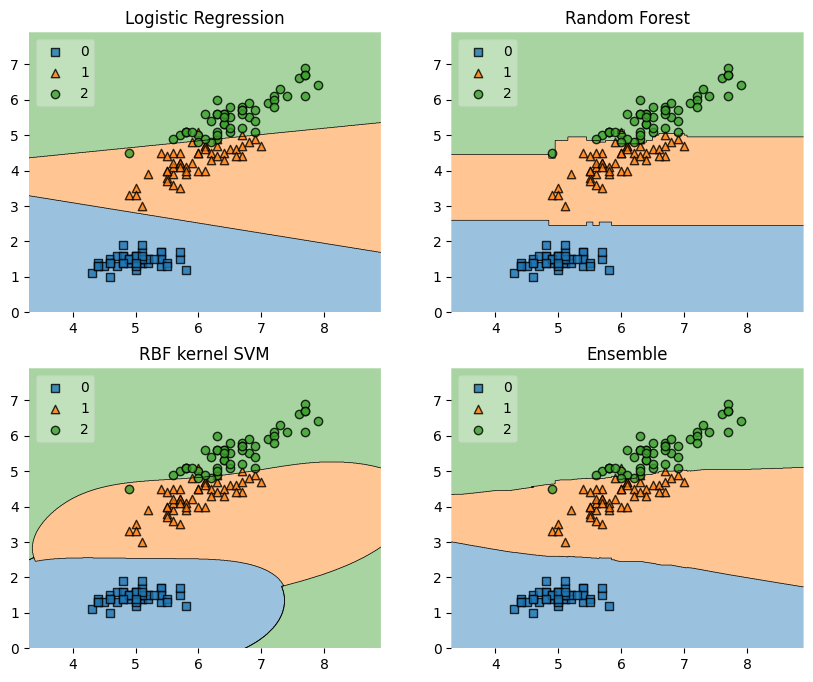

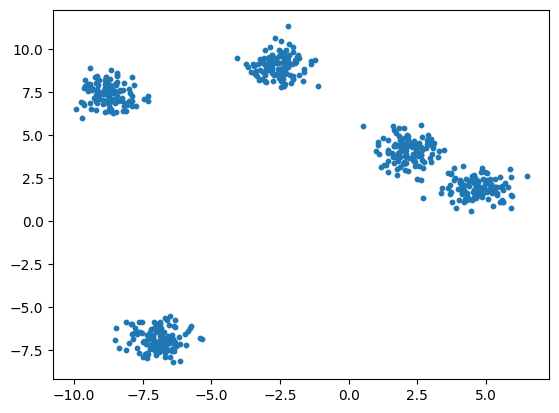

In [6]:
# Grafica
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'RBF kernel SVM', 'Ensemble'],
                         itertools.product([0,1], repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

X, y = make_blobs(n_samples=600, centers=5, cluster_std=0.60, random_state=42)
plt.scatter(X[:,0], X[:,1], s=10)
plt.show()

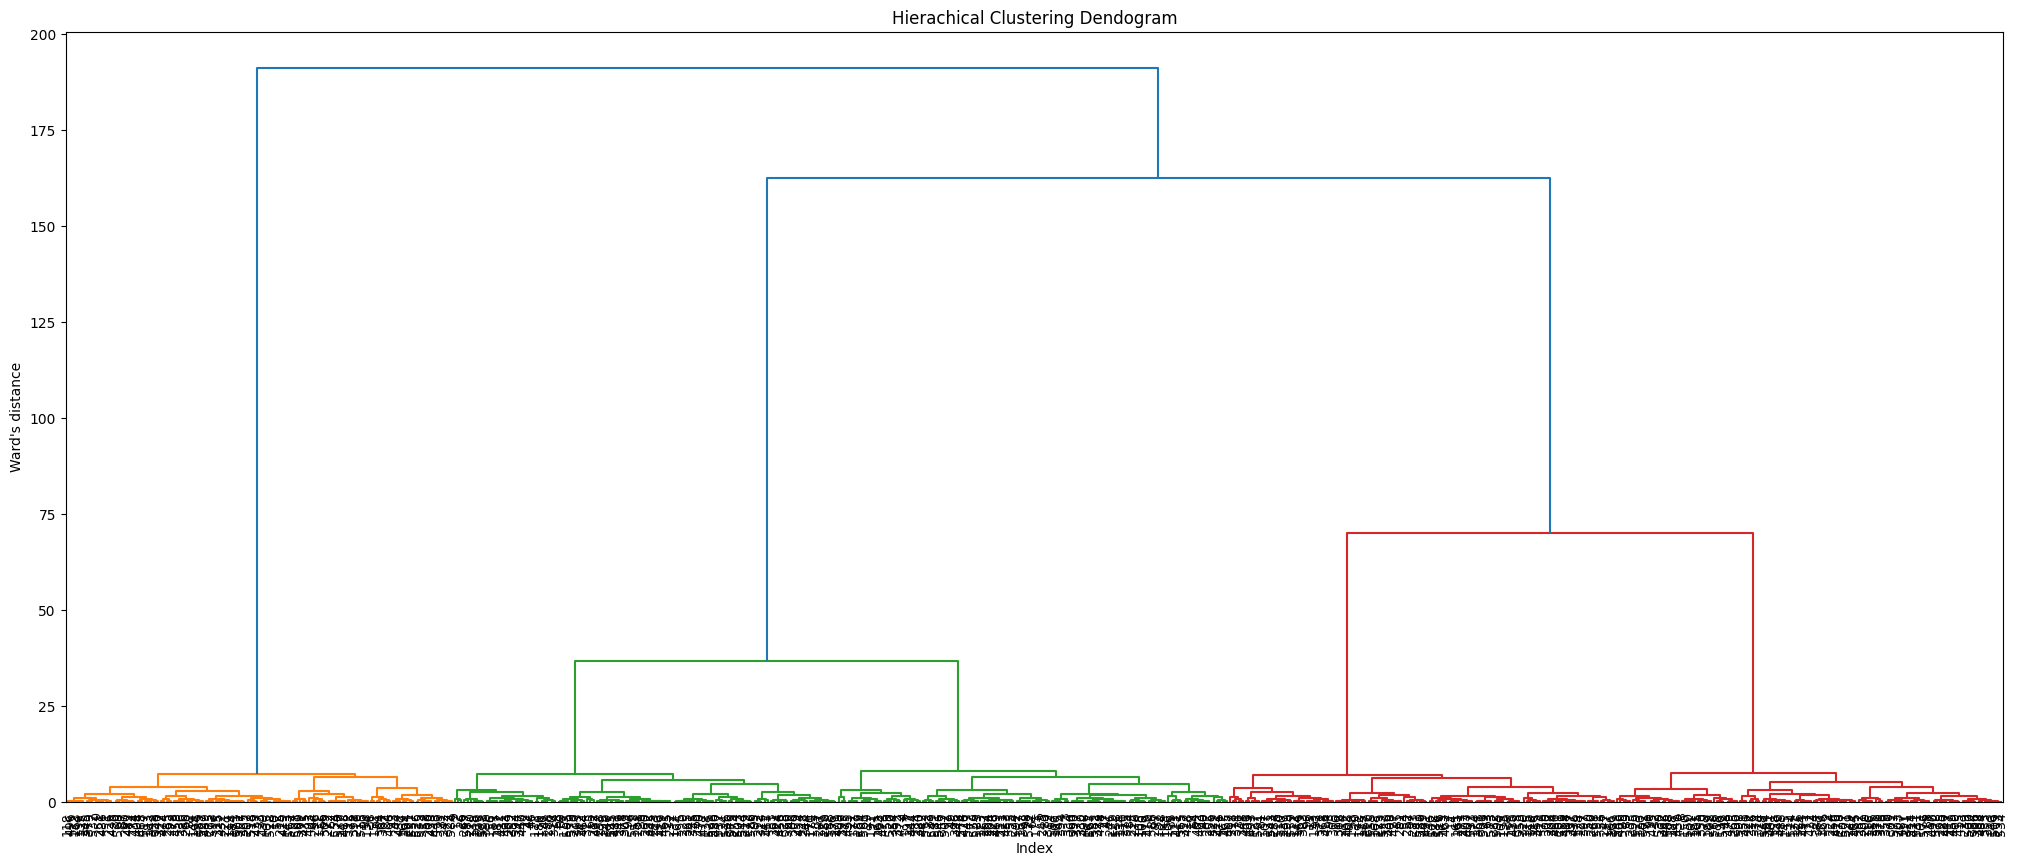

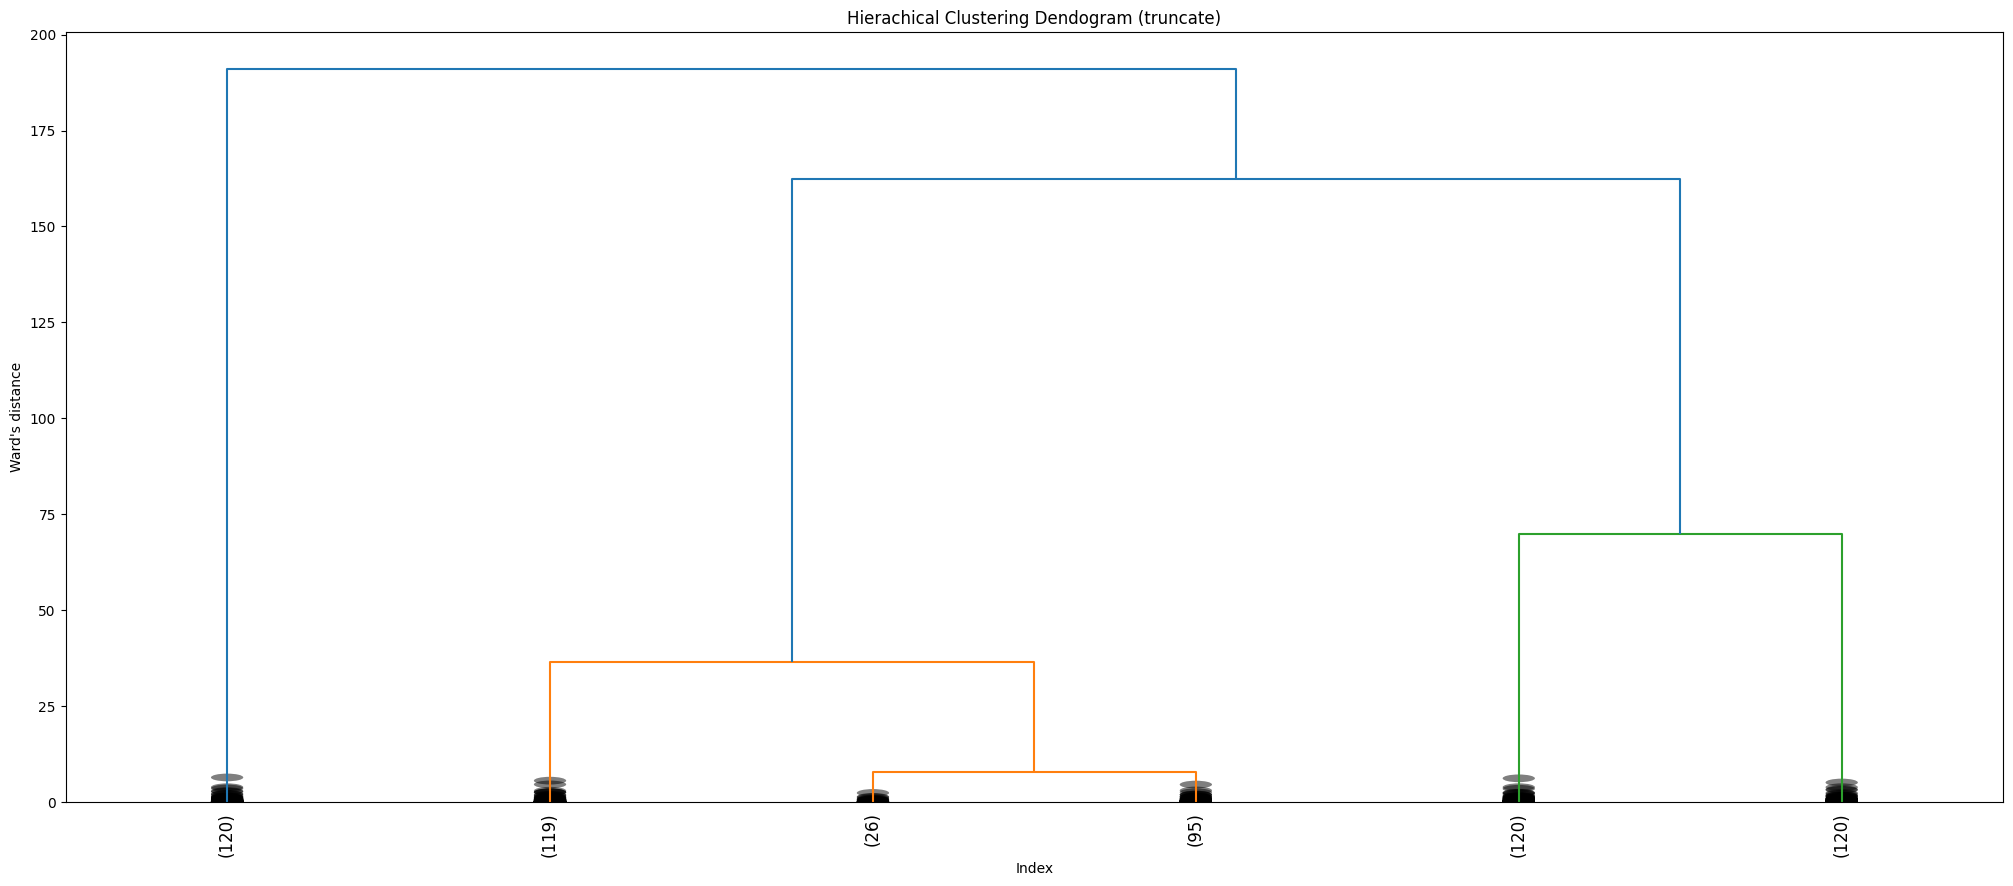

[[1.05000000e+02 5.28000000e+02 2.11565697e-03 2.00000000e+00]
 [7.00000000e+01 3.01000000e+02 7.17038863e-03 2.00000000e+00]
 [1.74000000e+02 3.58000000e+02 7.41240066e-03 2.00000000e+00]
 ...
 [1.19000000e+03 1.19300000e+03 6.99900010e+01 2.40000000e+02]
 [1.19500000e+03 1.19600000e+03 1.62402229e+02 4.80000000e+02]
 [1.19100000e+03 1.19700000e+03 1.91095481e+02 6.00000000e+02]]


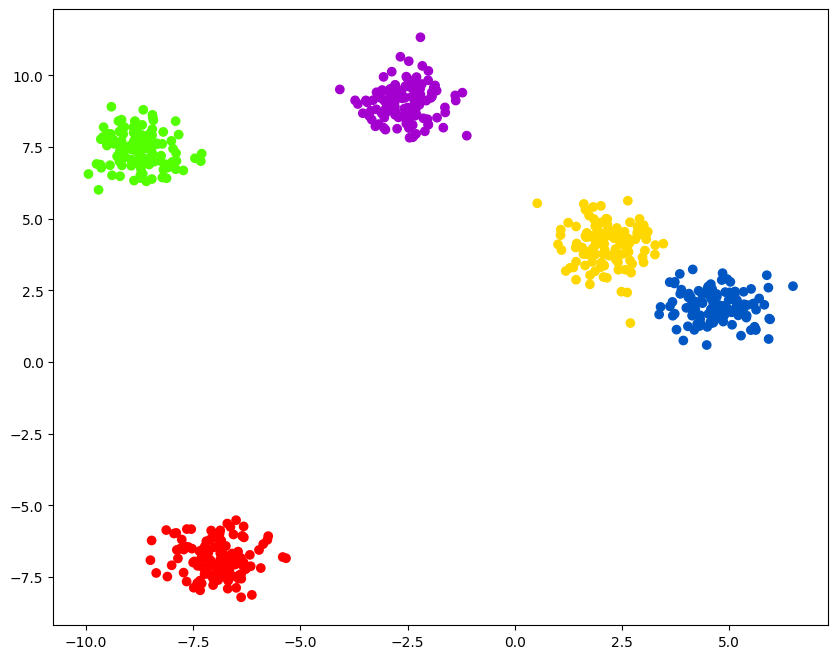

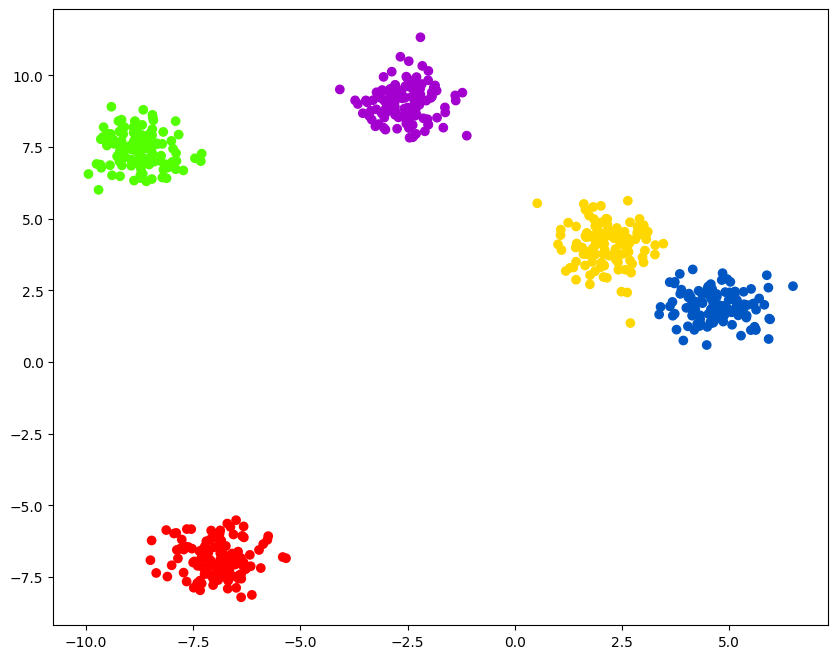

In [7]:
distance = linkage(X, 'ward')

plt.figure(figsize=(25,10))
plt.title('Hierachical Clustering Dendogram')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, leaf_rotation=90.,leaf_font_size=9.,)
plt.show()

#truncar dendrograma
plt.figure(figsize=(25,10))
plt.title('Hierachical Clustering Dendogram (truncate)')
plt.xlabel('Index')
plt.ylabel("Ward's distance")
dendrogram(distance, truncate_mode='lastp', p=6, leaf_rotation=90.,leaf_font_size=12., show_contracted=True)
plt.show()


max_d = 25
clusters = fcluster(distance, max_d, criterion='distance')
print(distance)

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()

k = 5
clusters = fcluster(distance, k, criterion='maxclust')
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
plt.show()